In [ ]:
# change current directory to parent so that importing custom utils are simple
%cd ../

In [ ]:
# restore the checkpoint.
# due to the github file size limit, the weights are split into 3 parts.
# in case of local environments, you dont have to do this but can directly load the ckpt
!cat weights/ckpt/temp_VGG16_256_part_* > weights/ckpt/VGG16_256_860.data-00000-of-00001


In [ ]:
import os
import cv2
import tensorflow as tf
import tensorflow.keras.backend as K
import numpy as np
import matplotlib.pyplot as plt
from utils.models import P2PNet
from utils.general import pad, postprocess



In [9]:
# load P2PModel
K.clear_session()
model = P2PNet(feature_size=256, backbone_name="vgg16", preprocessing=True)
model.load_weights("weights/ckpt/VGG16_256_860")

2023-04-28 08:19:31.595 | INFO     | utils.backbone:load_feature_extraction_model:24 - Loading model: vgg16
2023-04-28 08:19:31.596 | INFO     | utils.backbone:load_feature_extraction_model:30 - {'core': <function VGG16 at 0x7f2e6af47670>, 'preprocess_input': <function preprocess_input at 0x7f2e6af47700>, 'intermediate_layer_names': ['block4_conv3', 'block5_conv3']}


2023-04-28 08:19:35.860698: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600


1/1 [==============================] - 3s 3s/step


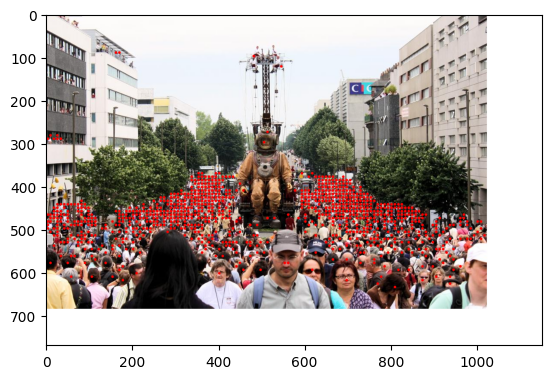

1/1 [==============================] - 1s 822ms/step


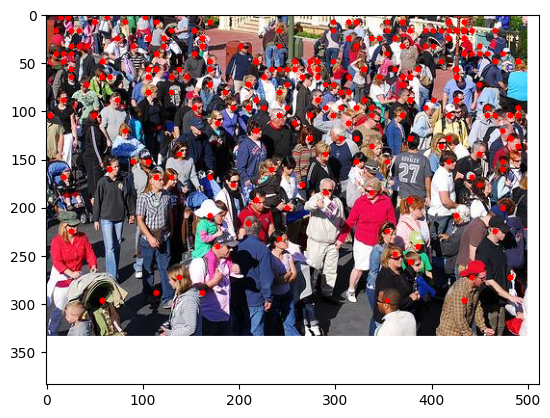

1/1 [==============================] - 0s 28ms/step


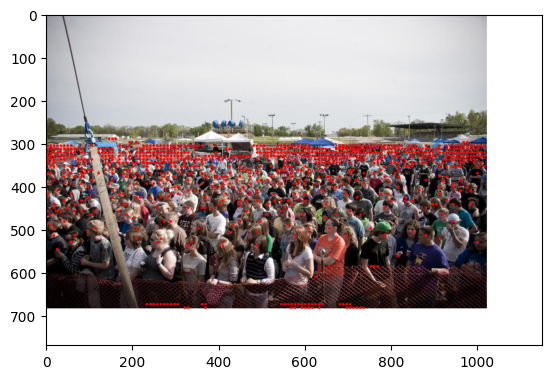

1/1 [==============================] - 0s 34ms/step


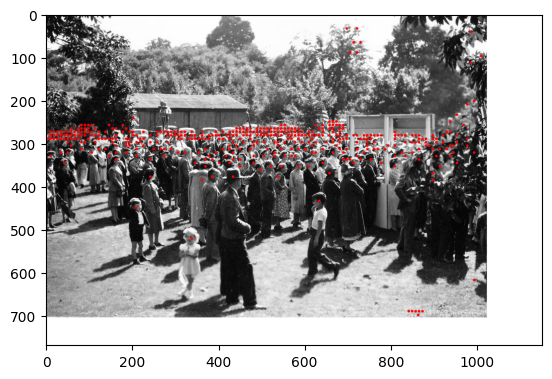

1/1 [==============================] - 0s 33ms/step


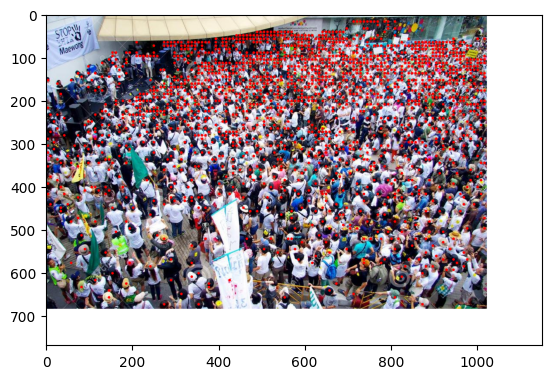

1/1 [==============================] - 1s 1s/step


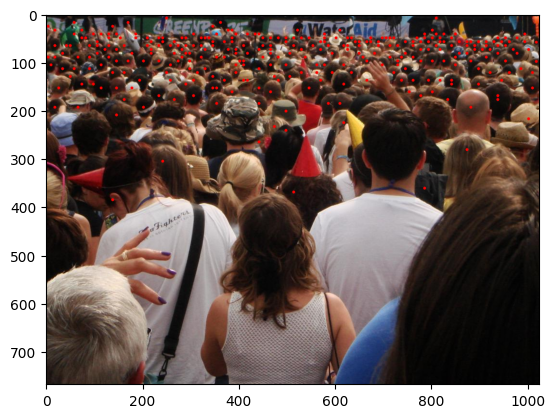

1/1 [==============================] - 0s 31ms/step


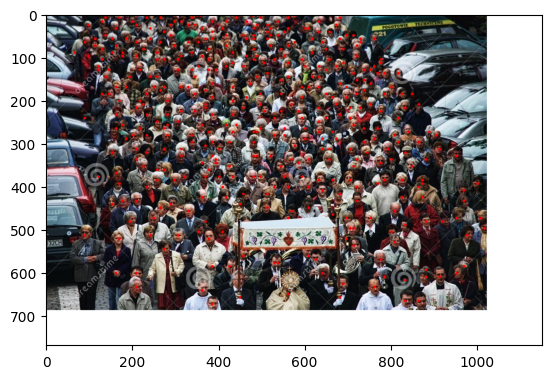

1/1 [==============================] - 1s 858ms/step


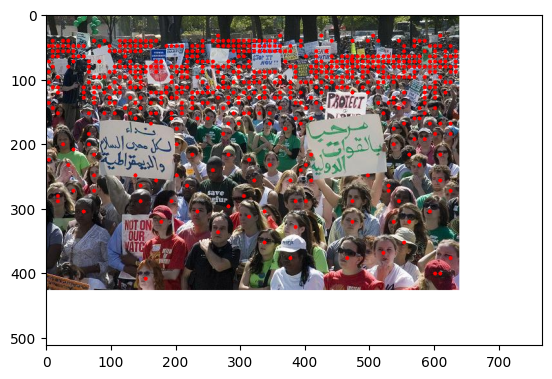

1/1 [==============================] - 0s 27ms/step


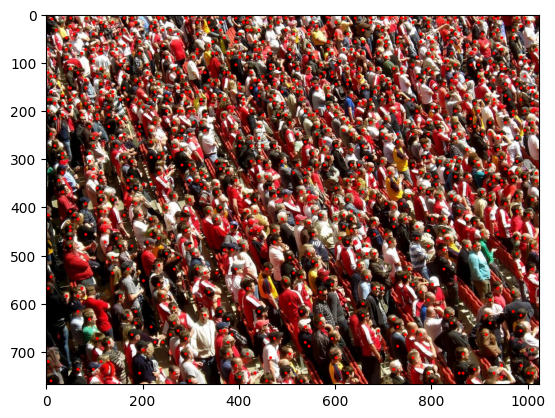

1/1 [==============================] - 0s 33ms/step


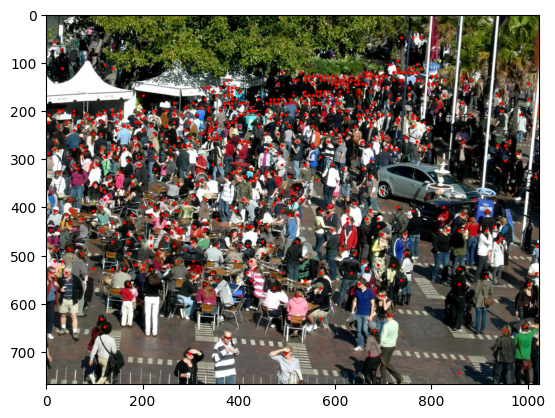

In [10]:
pardir = "./resources/shha_test_images/"
files = os.listdir(pardir)
for file in files:
    path = os.path.join(pardir, file)
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # this depends on the model
    image = pad(image)
    
    pred = model.predict(np.expand_dims(image.astype(np.float32), axis=0))[0]
    coords = postprocess(pred)
    for coord in coords:
        cv2.circle(image, (int(coord[0]), int(coord[1])), 3, (255, 0, 0), -1)
    plt.imshow(image)
    plt.show() 

